In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/Capstone/')

In [11]:
pd.set_option('display.max_rows', None)

In [4]:
dat02 = pd.read_csv('Copy of msn_02_fuel_leak_signals_preprocessed.csv', sep = ';')
dat11 = pd.read_csv('Copy of msn_11_fuel_leak_signals_preprocessed.csv', sep = ';')
dat10 = pd.read_csv('Copy of msn_10_fuel_leak_signals_preprocessed.csv', sep = ';')
dat12 = pd.read_csv('Copy of msn_12_fuel_leak_signals_preprocessed.csv', sep = ';')
dat14 = pd.read_csv('Copy of msn_14_fuel_leak_signals_preprocessed.csv', sep = ';')
dat29 = pd.read_csv('Copy of msn_29_fuel_leak_signals_preprocessed.csv', sep = ';')
dat37 = pd.read_csv('Copy of msn_37_fuel_leak_signals_preprocessed.csv', sep = ';')
dat53 = pd.read_csv('Copy of msn_53_fuel_leak_signals_preprocessed.csv', sep = ';')

In [5]:
datasets_info = []

# Update the list with the dimensions of each dataset
datasets_info.append({'Dataset': 'MSN02', 'Rows': len(dat02), 'Columns': len(dat02.columns)})
datasets_info.append({'Dataset': 'MSN10', 'Rows': len(dat10), 'Columns': len(dat10.columns)})
datasets_info.append({'Dataset': 'MSN11', 'Rows': len(dat11), 'Columns': len(dat11.columns)})
datasets_info.append({'Dataset': 'MSN12', 'Rows': len(dat12), 'Columns': len(dat12.columns)})
datasets_info.append({'Dataset': 'MSN14', 'Rows': len(dat14), 'Columns': len(dat14.columns)})
datasets_info.append({'Dataset': 'MSN29', 'Rows': len(dat29), 'Columns': len(dat29.columns)})
datasets_info.append({'Dataset': 'MSN37', 'Rows': len(dat37), 'Columns': len(dat37.columns)})
datasets_info.append({'Dataset': 'MSN53', 'Rows': len(dat53), 'Columns': len(dat53.columns)})

# Add more datasets in a similar manner if you have more

# Convert the list of dictionaries into a DataFrame
datasets_df = pd.DataFrame(datasets_info)

# Display the DataFrame
print(datasets_df)

  Dataset     Rows  Columns
0   MSN02   623580      111
1   MSN10   621610       17
2   MSN11  4455992       17
3   MSN12  3247664       17
4   MSN14  4640993       17
5   MSN29  4129447       17
6   MSN37  3236645       17
7   MSN53  3034227       17


In [ ]:
description_dat11 = dat11.describe().loc[['count', 'mean']].T
description_dat10 = dat10.describe().loc[['count', 'mean']].T
description_dat12 = dat12.describe().loc[['count', 'mean']].T
description_dat14 = dat14.describe().loc[['count', 'mean']].T
description_dat29 = dat29.describe().loc[['count', 'mean']].T
description_dat37 = dat37.describe().loc[['count', 'mean']].T
description_dat53 = dat53.describe().loc[['count', 'mean']].T

# Create MultiIndex DataFrame
headers = pd.MultiIndex.from_product([['count', 'mean'], ['dat11', 'dat10', 'dat12', 'dat14', 'dat29', 'dat37', 'dat53']])
descriptions_concatenated = pd.DataFrame(columns=headers)

# Fill DataFrame with descriptions
descriptions_concatenated['count', 'dat11'] = description_dat11['count']
descriptions_concatenated['mean', 'dat11'] = description_dat11['mean']
descriptions_concatenated['count', 'dat10'] = description_dat10['count']
descriptions_concatenated['mean', 'dat10'] = description_dat10['mean']
descriptions_concatenated['count', 'dat12'] = description_dat12['count']
descriptions_concatenated['mean', 'dat12'] = description_dat12['mean']
descriptions_concatenated['count', 'dat14'] = description_dat14['count']
descriptions_concatenated['mean', 'dat14'] = description_dat14['mean']
descriptions_concatenated['count', 'dat29'] = description_dat29['count']
descriptions_concatenated['mean', 'dat29'] = description_dat29['mean']
descriptions_concatenated['count', 'dat37'] = description_dat37['count']
descriptions_concatenated['mean', 'dat37'] = description_dat37['mean']
descriptions_concatenated['count', 'dat53'] = description_dat53['count']
descriptions_concatenated['mean', 'dat53'] = description_dat53['mean']

In [ ]:
descriptions_concatenated

count                                             \
                        dat11     dat10      dat12      dat14      dat29   
FUEL_USED_2          324911.0   59338.0   124152.0   268934.0   285824.0   
FUEL_USED_3          316168.0   60936.0   123529.0   269344.0   279830.0   
FUEL_USED_4          291141.0   55775.0   122825.0   266897.0   277245.0   
FW_GEO_ALTITUDE     4155665.0  538673.0  3207304.0  4575506.0  3809922.0   
VALUE_FOB           4155665.0  538673.0  3207494.0  4575506.0  3809922.0   
VALUE_FUEL_QTY_CT   4155665.0  538673.0  3207494.0  4575506.0  3809922.0   
VALUE_FUEL_QTY_FT1  4155665.0  538673.0  3207494.0  4575506.0  3809922.0   
VALUE_FUEL_QTY_FT2  4155665.0  538673.0  3207494.0  4575506.0  3809922.0   
VALUE_FUEL_QTY_FT3  4155665.0  538673.0  3207494.0  4575506.0  3809922.0   
VALUE_FUEL_QTY_FT4  4155665.0  538673.0  3207494.0  4575506.0  3809922.0   
VALUE_FUEL_QTY_LXT  4155665.0  538673.0  3207494.0  4575506.0  3809922.0   
VALUE_FUEL_QTY_RXT  4155665.0  538673.0  3207494.0  4575506.0  3809922.0   
FLIGHT_PHASE_COUNT  4155791.0  539246.0  3207857.0  4575690.0  3810867.0   
FUEL_USED_1          329656.0   52439.0   128720.0   269102.0   277519.0   
Flight              4455992.0  621610.0  3247664.0  4640993.0  4129447.0   

                                                  mean                \
                        dat37      dat53         dat11         dat10   
FUEL_USED_2          317434.0   266810.0   2570.191604   3004.730089   
FUEL_USED_3          317076.0   266479.0   2310.106047   3372.023270   
FUEL_USED_4          317115.0   267185.0   2915.032823   4860.629856   
FW_GEO_ALTITUDE     3163346.0  2987148.0  21075.984710  19236.514856   
VALUE_FOB           3163516.0  2987148.0  23271.112707  24431.395444   
VALUE_FUEL_QTY_CT   3163516.0  2987148.0    702.045073   1199.659970   
VALUE_FUEL_QTY_FT1  3163516.0  2987148.0   1827.308516   1819.819020   
VALUE_FUEL_QTY_FT2  3163516.0  2987148.0   2494.946632   2485.720673   
VALUE_FUEL_QTY_FT3  3163516.0  2987148.0   2492.643133   2482.947192   
VALUE_FUEL_QTY_FT4  3163516.0  2987148.0   1833.173776   1823.620798   
VALUE_FUEL_QTY_LXT  3163516.0  2987148.0   6986.448012   7301.411474   
VALUE_FUEL_QTY_RXT  3163516.0  2987148.0   6936.668353   7321.264030   
FLIGHT_PHASE_COUNT  3163852.0  2987514.0      7.504459      7.510522   
FUEL_USED_1          317856.0   267587.0   2445.524163   4260.426489   
Flight              3236645.0  3034227.0   1224.538701    237.461659   

                                                                            \
                           dat12         dat14         dat29         dat37   
FUEL_USED_2          1320.752692   1727.960783   2230.903268   1555.653325   
FUEL_USED_3          1719.723999   1837.072076   2566.712294   1774.469366   
FUEL_USED_4          1719.573807   2054.903399   2814.453385   1974.189309   
FW_GEO_ALTITUDE     20112.589382  20487.600274  20464.206670  17997.956386   
VALUE_FOB           23555.127499  22880.423493  23508.781966  21235.118687   
VALUE_FUEL_QTY_CT     714.267370    741.879836    723.400819    400.714837   
VALUE_FUEL_QTY_FT1   1827.138689   1830.826389   1842.167602   1741.096289   
VALUE_FUEL_QTY_FT2   2494.933903   2493.159561   2515.021759   2376.742780   
VALUE_FUEL_QTY_FT3   2486.750433   2484.932847   2508.812267   2372.390266   
VALUE_FUEL_QTY_FT4   1827.242723   1832.843969   1844.369682   1747.830827   
VALUE_FUEL_QTY_LXT   7123.941625   6788.511214   7059.631878   6297.986408   
VALUE_FUEL_QTY_RXT   7083.025314   6710.461418   7017.834871   6300.666945   
FLIGHT_PHASE_COUNT      7.499455      7.551192      7.477281      7.553880   
FUEL_USED_1          1569.799179   1634.931697   2602.365738   1536.298957   
Flight                220.722288    297.526757   1386.840768    227.877216   

                                  
                           dat53  
FUEL_USED_2          1508.175140  
FUEL_USED_3          1614.710368  
FUEL_USED_4          1829.347840  
FW_G

In [ ]:
description_dat11 = dat11.describe().loc[['count', 'mean']].T
description_dat10 = dat10.describe().loc[['count', 'mean']].T
description_dat12 = dat12.describe().loc[['count', 'mean']].T
description_dat14 = dat14.describe().loc[['count', 'mean']].T
description_dat29 = dat29.describe().loc[['count', 'mean']].T
description_dat37 = dat37.describe().loc[['count', 'mean']].T
description_dat53 = dat53.describe().loc[['count', 'mean']].T

# Create MultiIndex DataFrame
headers = pd.MultiIndex.from_product([['dat11', 'dat10', 'dat12', 'dat14', 'dat29', 'dat37', 'dat53'], ['count', 'mean']])
descriptions_concatenated = pd.DataFrame(columns=headers)

# Fill DataFrame with descriptions
descriptions_concatenated['dat11', 'count'] = description_dat11['count']
descriptions_concatenated['dat11', 'mean'] = description_dat11['mean']
descriptions_concatenated['dat10', 'count'] = description_dat10['count']
descriptions_concatenated['dat10', 'mean'] = description_dat10['mean']
descriptions_concatenated['dat12', 'count'] = description_dat12['count']
descriptions_concatenated['dat12', 'mean'] = description_dat12['mean']
descriptions_concatenated['dat14', 'count'] = description_dat14['count']
descriptions_concatenated['dat14', 'mean'] = description_dat14['mean']
descriptions_concatenated['dat29', 'count'] = description_dat29['count']
descriptions_concatenated['dat29', 'mean'] = description_dat29['mean']
descriptions_concatenated['dat37', 'count'] = description_dat37['count']
descriptions_concatenated['dat37', 'mean'] = description_dat37['mean']
descriptions_concatenated['dat53', 'count'] = description_dat53['count']
descriptions_concatenated['dat53', 'mean'] = description_dat53['mean']

# Output descriptions with increased font size
descriptions_concatenated.style.set_table_styles([{'selector': 'th', 'props': [('font-size', '16px')]}])

In [ ]:
dat10x = dat10.drop(['Flight'], axis = True)
dat11x = dat11.drop(['Flight'], axis = True)
dat12x = dat12.drop(['Flight'], axis = True)
dat14x = dat14.drop(['Flight'], axis = True)
dat29x = dat29.drop(['Flight'], axis = True)
dat37x = dat37.drop(['Flight'], axis = True)
dat53x = dat53.drop(['Flight'], axis = True)

description_dat11 = dat11x.describe().loc[['mean']].T
description_dat10 = dat10x.describe().loc[['mean']].T
description_dat12 = dat12x.describe().loc[['mean']].T
description_dat14 = dat14x.describe().loc[['mean']].T
description_dat29 = dat29x.describe().loc[['mean']].T
description_dat37 = dat37x.describe().loc[['mean']].T
description_dat53 = dat53x.describe().loc[['mean']].T

headers = pd.MultiIndex.from_product([['dat11', 'dat10', 'dat12', 'dat14', 'dat29', 'dat37', 'dat53'], ['mean']])
descriptions_concatenated = pd.DataFrame(columns=headers)


descriptions_concatenated['dat11', 'mean'] = description_dat11['mean']
descriptions_concatenated['dat10', 'mean'] = description_dat10['mean']
descriptions_concatenated['dat12', 'mean'] = description_dat12['mean']
descriptions_concatenated['dat14', 'mean'] = description_dat14['mean']
descriptions_concatenated['dat29', 'mean'] = description_dat29['mean']
descriptions_concatenated['dat37', 'mean'] = description_dat37['mean']
descriptions_concatenated['dat53', 'mean'] = description_dat53['mean']

In [ ]:
descriptions_concatenated_rounded = descriptions_concatenated.round(2)
print(descriptions_concatenated_rounded)

                       dat11     dat10     dat12     dat14     dat29  \
                        mean      mean      mean      mean      mean   
FUEL_USED_2          2570.19   3004.73   1320.75   1727.96   2230.90   
FUEL_USED_3          2310.11   3372.02   1719.72   1837.07   2566.71   
FUEL_USED_4          2915.03   4860.63   1719.57   2054.90   2814.45   
FW_GEO_ALTITUDE     21075.98  19236.51  20112.59  20487.60  20464.21   
VALUE_FOB           23271.11  24431.40  23555.13  22880.42  23508.78   
VALUE_FUEL_QTY_CT     702.05   1199.66    714.27    741.88    723.40   
VALUE_FUEL_QTY_FT1   1827.31   1819.82   1827.14   1830.83   1842.17   
VALUE_FUEL_QTY_FT2   2494.95   2485.72   2494.93   2493.16   2515.02   
VALUE_FUEL_QTY_FT3   2492.64   2482.95   2486.75   2484.93   2508.81   
VALUE_FUEL_QTY_FT4   1833.17   1823.62   1827.24   1832.84   1844.37   
VALUE_FUEL_QTY_LXT   6986.45   7301.41   7123.94   6788.51   7059.63   
VALUE_FUEL_QTY_RXT   6936.67   7321.26   7083.03   6710.46   701

In [ ]:

# Compute missing value ratios for each dataset
missing_ratio_10 = dat10.isnull().mean() * 100
missing_ratio_11 = dat11.isnull().mean() * 100
missing_ratio_12 = dat12.isnull().mean() * 100
missing_ratio_14 = dat14.isnull().mean() * 100
missing_ratio_29 = dat29.isnull().mean() * 100
missing_ratio_37 = dat37.isnull().mean() * 100
missing_ratio_53 = dat53.isnull().mean() * 100

# Create a DataFrame to store the missing value ratios
headers = pd.MultiIndex.from_product([['dat11', 'dat10', 'dat12', 'dat14', 'dat29', 'dat37', 'dat53']])
missing = pd.DataFrame(columns=headers)

# Populate the DataFrame with missing value ratios
missing['dat10'] = missing_ratio_10
missing['dat11'] = missing_ratio_11
missing['dat12'] = missing_ratio_12
missing['dat14'] = missing_ratio_14
missing['dat29'] = missing_ratio_29
missing['dat37'] = missing_ratio_37
missing['dat53'] = missing_ratio_53

In [ ]:
missing.round(2)

,dat11,dat10,dat12,dat14,dat29,dat37,dat53
UTC_TIME,0.00,0.00,0.00,0.00,0.00,0.00,0.00
FUEL_USED_2,92.71,90.45,96.18,94.21,93.08,90.19,91.21
FUEL_USED_3,92.90,90.20,96.20,94.20,93.22,90.20,91.22
FUEL_USED_4,93.47,91.03,96.22,94.25,93.29,90.20,91.19
FW_GEO_ALTITUDE,6.74,13.34,1.24,1.41,7.74,2.26,1.55
VALUE_FOB,6.74,13.34,1.24,1.41,7.74,2.26,1.55
VALUE_FUEL_QTY_CT,6.74,13.34,1.24,1.41,7.74,2.26,1.55
VALUE_FUEL_QTY_FT1,6.74,13.34,1.24,1.41,7.74,2.26,1.55
VALUE_FUEL_QTY_FT2,6.74,13.34,1.24,1.41,7.74,2.26,1.55
VALUE_FUEL_QTY_FT3,6.74,13.34,1.24,1.41,7.74,2.26,1.55


<ipython-input-39-54022e64ce97>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_dat11 = dat11x.corr()
<ipython-input-39-54022e64ce97>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_dat10 = dat10x.corr()
<ipython-input-39-54022e64ce97>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_dat12 = dat12x.corr()
<ipython-input-39-54022e64ce97>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version

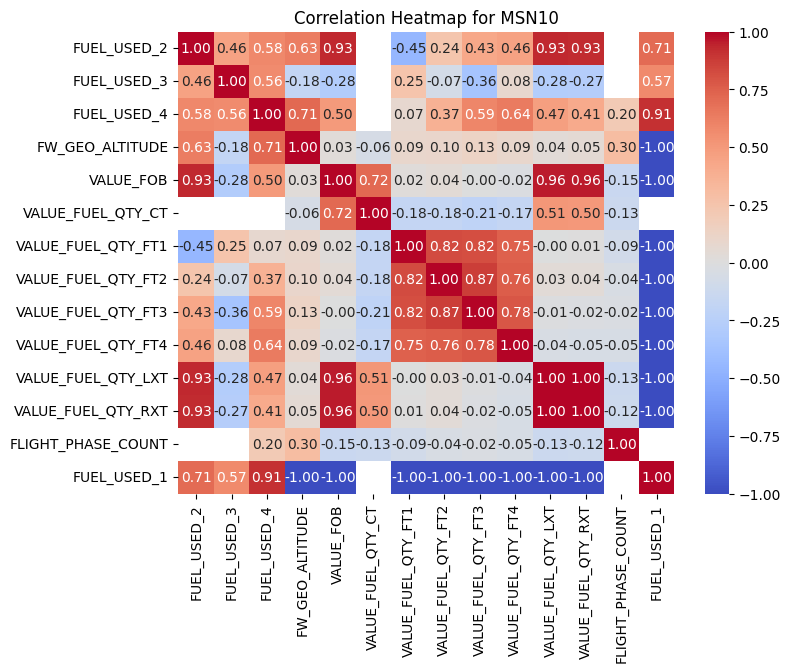

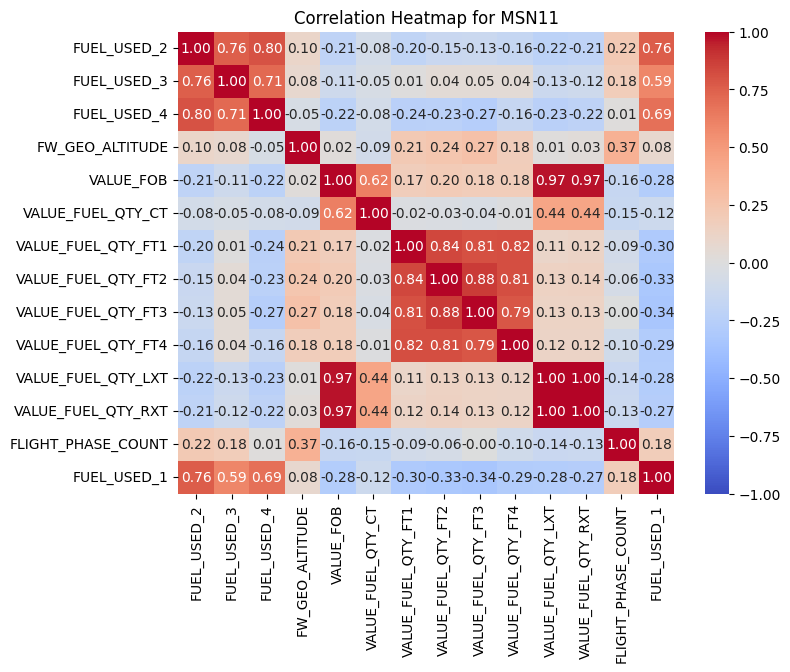

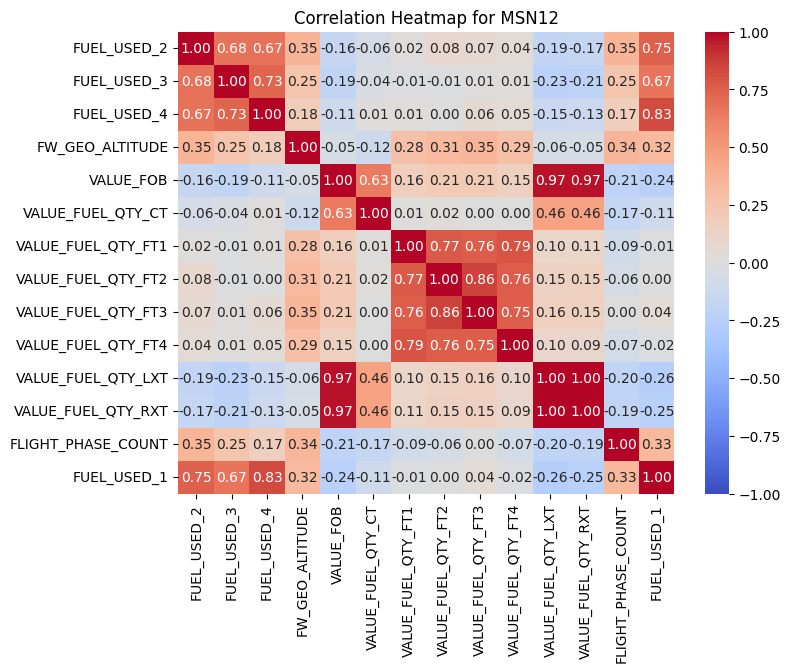

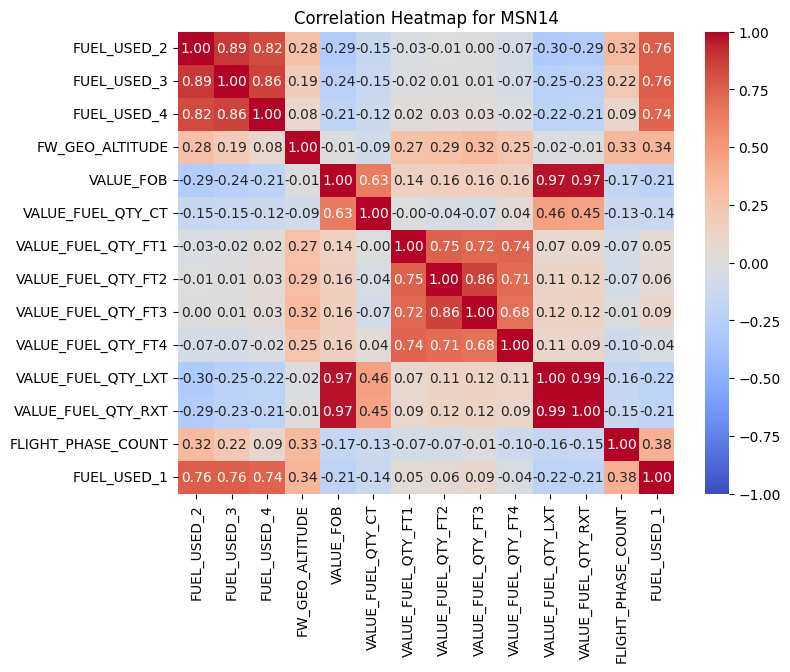

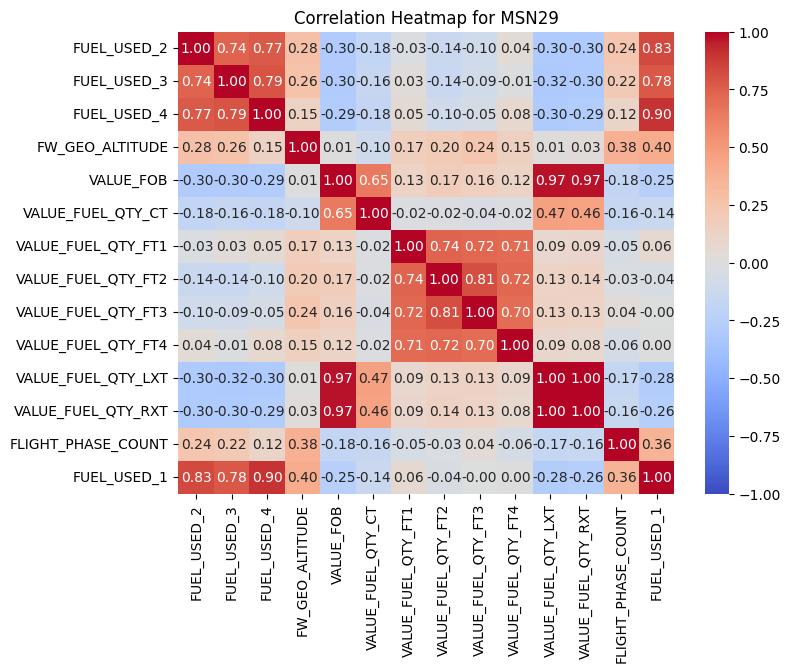

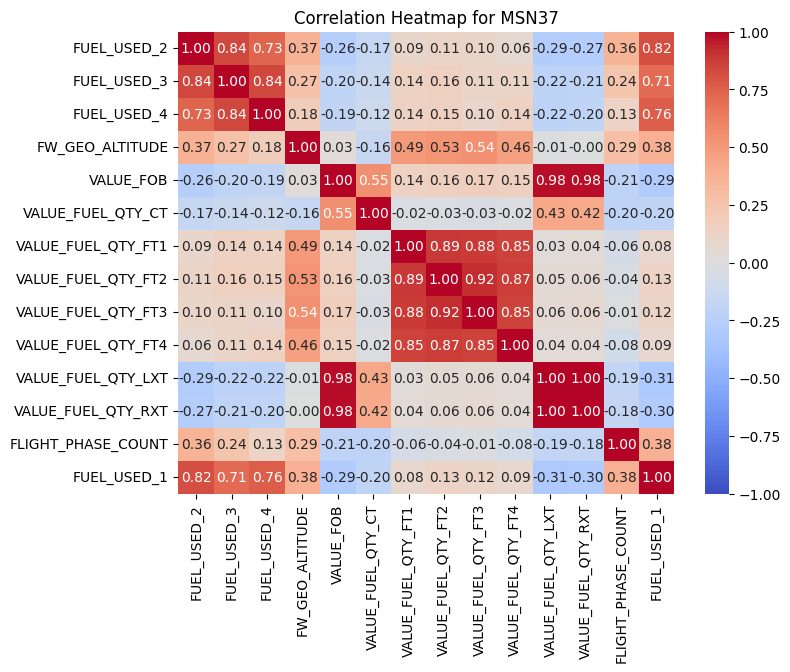

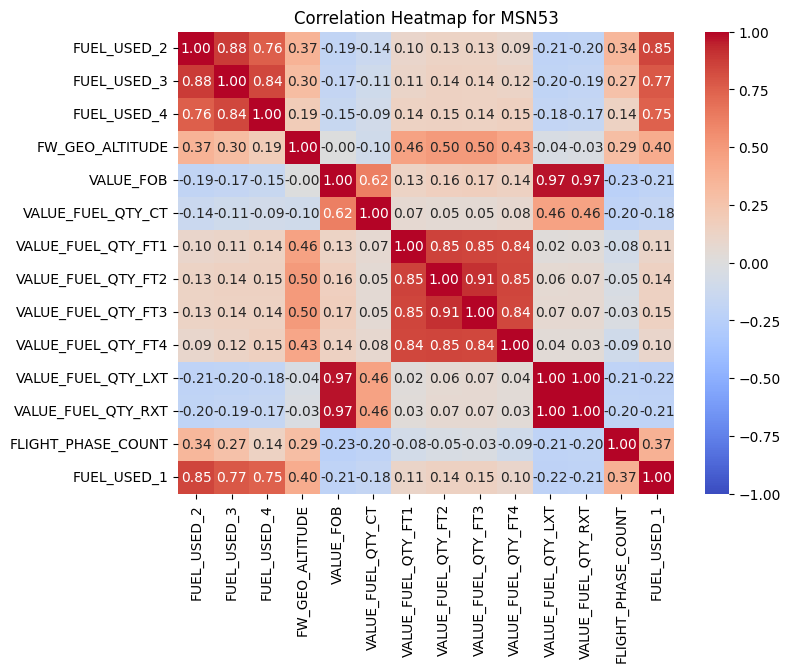

In [ ]:
correlation_dat11 = dat11x.corr()
correlation_dat10 = dat10x.corr()
correlation_dat12 = dat12x.corr()
correlation_dat14 = dat14x.corr()
correlation_dat29 = dat29x.corr()
correlation_dat37 = dat37x.corr()
correlation_dat53 = dat53x.corr()

# Plot heatmap for dat10
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat10, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN10")
plt.show()

# Plot heatmap for dat11
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat11, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN11")
plt.show()

# Plot heatmap for dat12
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat12, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN12")
plt.show()

# Plot heatmap for dat14
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat14, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN14")
plt.show()

# Plot heatmap for dat29
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat29, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN29")
plt.show()

# Plot heatmap for dat37
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat37, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN37")
plt.show()

# Plot heatmap for dat53
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat53, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN53")
plt.show()

<ipython-input-42-d1889f57472f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_dat11 = dat11x[dat11x['FLIGHT_PHASE_COUNT'] == 8.0].corr()
<ipython-input-42-d1889f57472f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_dat10 = dat10x[dat10x['FLIGHT_PHASE_COUNT'] == 8.0].corr()
<ipython-input-42-d1889f57472f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_dat12 = dat12x[dat12x['FLIGHT_PHASE_COUNT'] == 8.0].corr()
<ipython-input-42-d1889f5

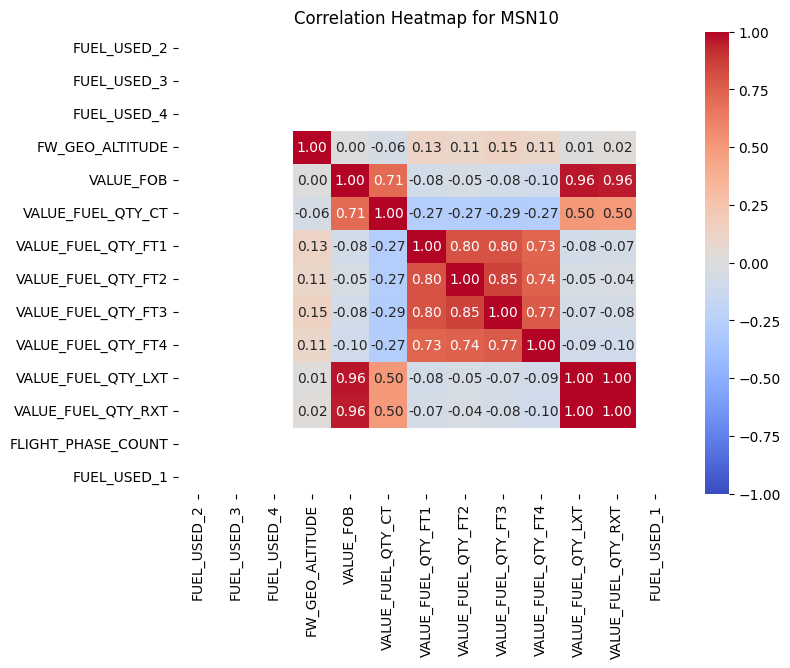

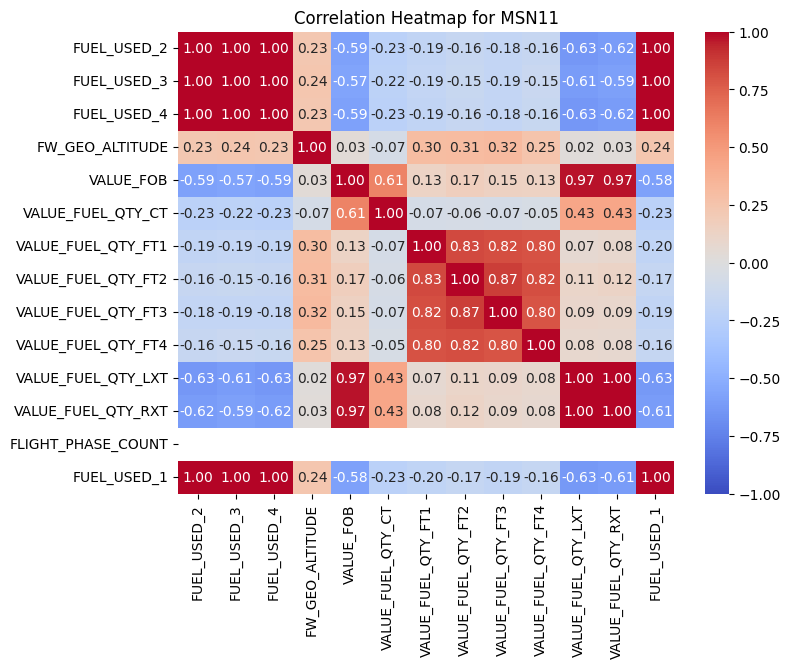

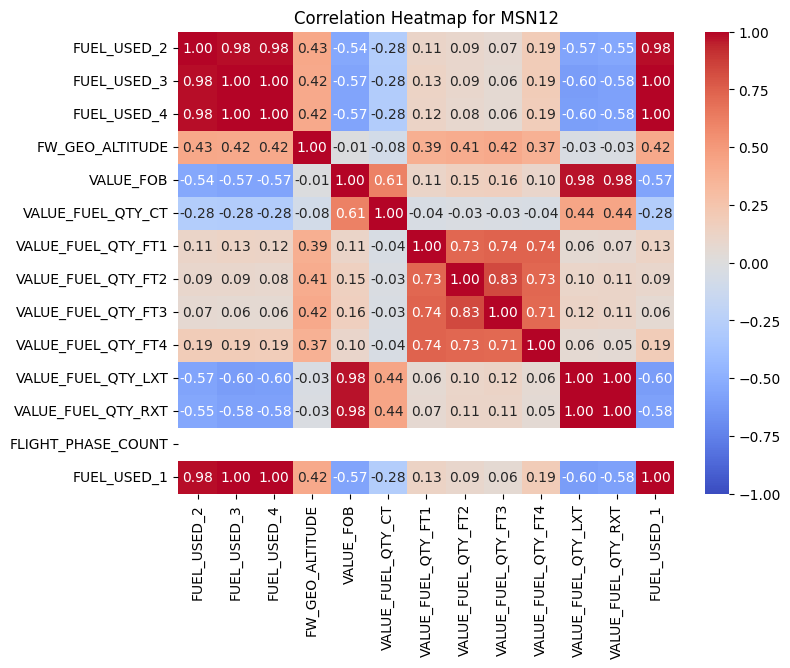

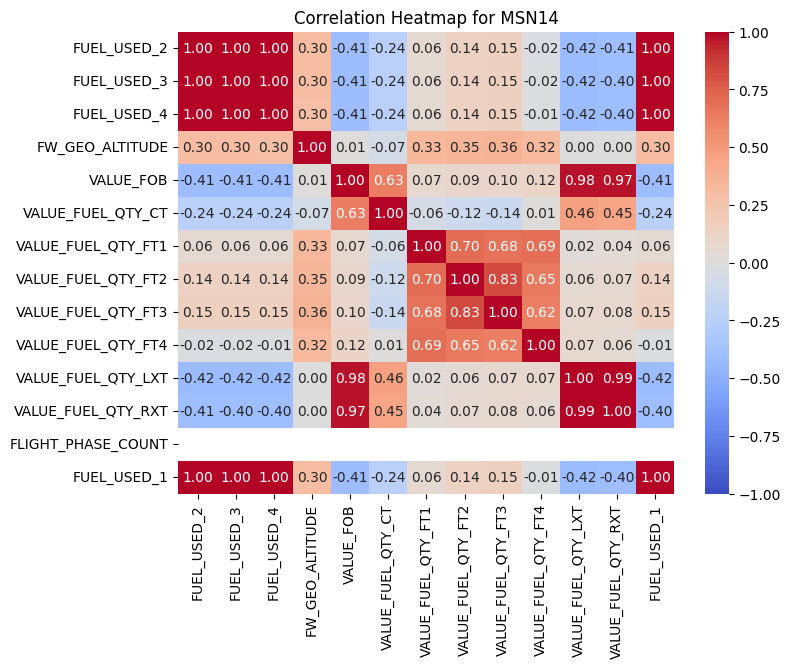

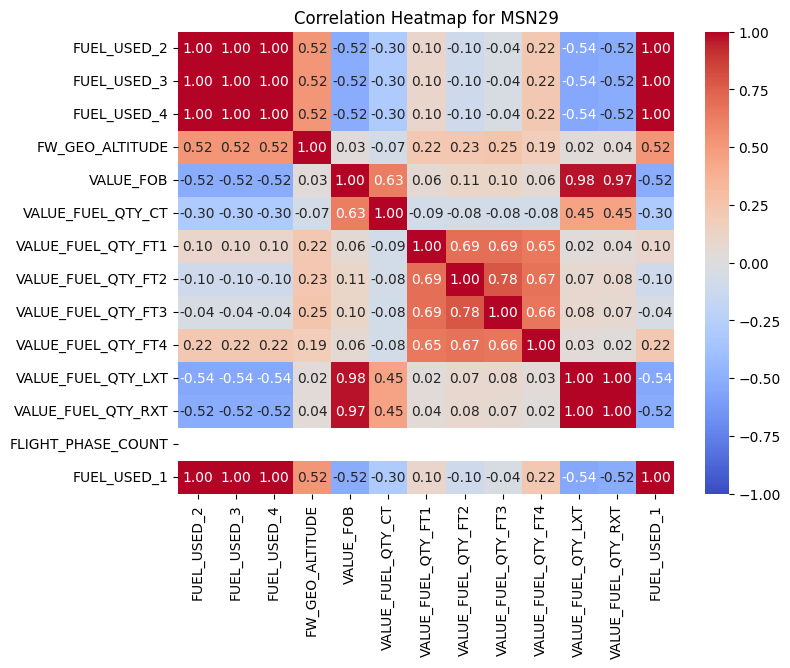

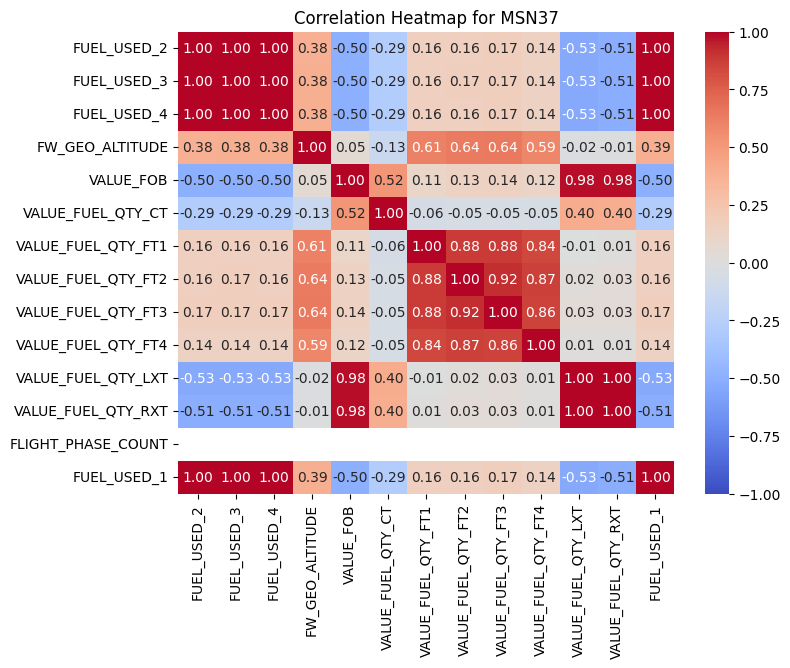

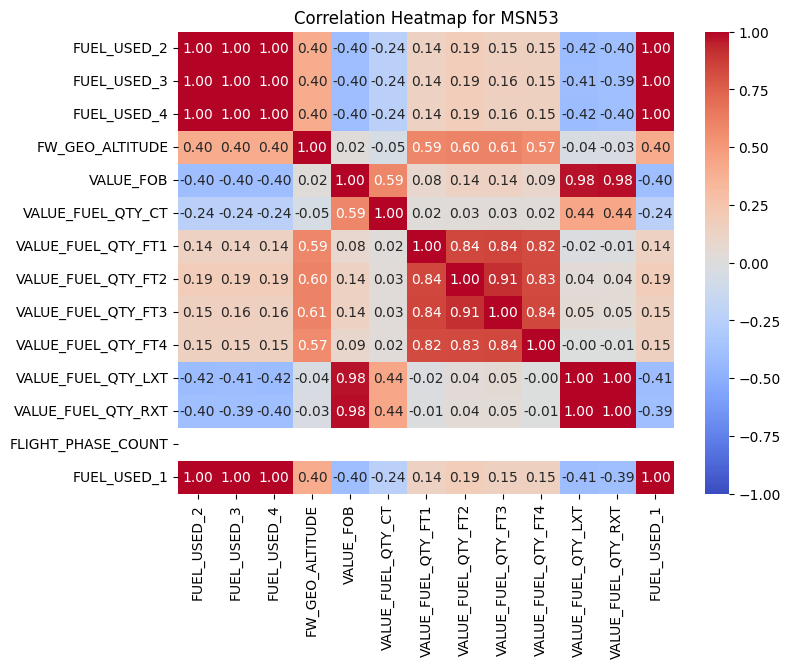

In [ ]:
# Heat Maps showing correlation only for phase 8
correlation_dat11 = dat11x[dat11x['FLIGHT_PHASE_COUNT'] == 8.0].corr()
correlation_dat10 = dat10x[dat10x['FLIGHT_PHASE_COUNT'] == 8.0].corr()
correlation_dat12 = dat12x[dat12x['FLIGHT_PHASE_COUNT'] == 8.0].corr()
correlation_dat14 = dat14x[dat14x['FLIGHT_PHASE_COUNT'] == 8.0].corr()
correlation_dat29 = dat29x[dat29x['FLIGHT_PHASE_COUNT'] == 8.0].corr()
correlation_dat37 = dat37x[dat37x['FLIGHT_PHASE_COUNT'] == 8.0].corr()
correlation_dat53 = dat53x[dat53x['FLIGHT_PHASE_COUNT'] == 8.0].corr()


correlation_dat11 = correlation_dat11.drop(['FLIGHT_PHASE_COUNT'], axis = True)
correlation_dat10 = correlation_dat10.drop(['FLIGHT_PHASE_COUNT'], axis = True)
correlation_dat12 = correlation_dat12.drop(['FLIGHT_PHASE_COUNT'], axis = True)
correlation_dat14 = correlation_dat14.drop(['FLIGHT_PHASE_COUNT'], axis = True)
correlation_dat29 = correlation_dat29.drop(['FLIGHT_PHASE_COUNT'], axis = True)
correlation_dat37 = correlation_dat37.drop(['FLIGHT_PHASE_COUNT'], axis = True)
correlation_dat53 = correlation_dat53.drop(['FLIGHT_PHASE_COUNT'], axis = True)

# Plot heatmap for dat10
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat10, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN10")
plt.show()

# Plot heatmap for dat11
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat11, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN11")
plt.show()

# Plot heatmap for dat12
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat12, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN12")
plt.show()

# Plot heatmap for dat14
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat14, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN14")
plt.show()

# Plot heatmap for dat29
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat29, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN29")
plt.show()

# Plot heatmap for dat37
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat37, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN37")
plt.show()

# Plot heatmap for dat53
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dat53, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for MSN53")
plt.show()

In [23]:
dat11phase8 = dat11[dat11['FLIGHT_PHASE_COUNT'] == 8.0]
dat10phase8 = dat10[dat10['FLIGHT_PHASE_COUNT'] == 8.0]
dat12phase8 = dat12[dat12['FLIGHT_PHASE_COUNT'] == 8.0]
dat14phase8 = dat14[dat14['FLIGHT_PHASE_COUNT'] == 8.0]
dat29phase8 = dat29[dat29['FLIGHT_PHASE_COUNT'] == 8.0]
dat37phase8 = dat37[dat37['FLIGHT_PHASE_COUNT'] == 8.0]
dat53phase8 = dat53[dat53['FLIGHT_PHASE_COUNT'] == 8.0]
dat02phase8 = dat02[dat02['FLIGHT_PHASE_COUNT'] == 8.0]

total_rows_dat11phase8 = len(dat11phase8)
total_rows_dat10phase8 = len(dat10phase8)
total_rows_dat12phase8 = len(dat12phase8)
total_rows_dat14phase8 = len(dat14phase8)
total_rows_dat29phase8 = len(dat29phase8)
total_rows_dat37phase8 = len(dat37phase8)
total_rows_dat53phase8 = len(dat53phase8)
total_rows_dat02phase8 = len(dat02phase8)

total_rows_all_datasets = (total_rows_dat11phase8 + total_rows_dat10phase8 +
                           total_rows_dat12phase8 + total_rows_dat14phase8 +
                           total_rows_dat29phase8 + total_rows_dat37phase8 +
                           total_rows_dat53phase8 + total_rows_dat02phase8)

print(total_rows_all_datasets)

18690962


In [6]:
missing_ratio_02 = dat02.isnull().mean() * 100

In [21]:
#average % of missing values
missing_ratio_02.mean()

5.787316711496449

In [22]:
missing_ratio_02

UTC_TIME                                 0.000000
MSN                                      0.000000
Flight                                   0.000000
ENGINE_RUNNING_1                         0.000000
ENGINE_RUNNING_2                         0.000000
ENGINE_RUNNING_3                         0.000000
ENGINE_RUNNING_4                         0.000000
FLIGHT_PHASE_COUNT                      10.090445
FUEL_FLOW_1                             17.422464
FUEL_FLOW_2                             17.156740
FUEL_FLOW_3                             17.155938
FUEL_FLOW_4                             17.458706
FUEL_PITCH                              10.145611
FUEL_ROLL                               10.145611
FUEL_TRANSFER_MODE_VALUE                10.137272
FUEL_USED_1                             17.421341
FUEL_USED_2                             17.155778
FUEL_USED_3                             17.155618
FUEL_USED_4                             17.458385
FW_GEO_ALTITUDE                         10.082908


In [24]:
grouped_dat02phase8 = dat02phase8.groupby('Flight')

# Filter out flights with length less than 1000
len(grouped_dat02phase8.filter(lambda x: len(x) >= 1000))

391144

0.37274447544821837